In [7]:
library(glmnet)
library(SLOPE)
library(bigstep)
library(ggplot2)
library(tidyr)
library(gridExtra)


# Project 1

### Problem 1

In [8]:
# data = scale(get(load("Lab3.Rdata")) - 10)
data = get(load("Lab3.Rdata"))
data = apply(data - 10, 2, function(col) col / sd(col))

In [9]:
data[1:5,]

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,3.320701,-4.672019,-3.6207425,-1.8788372,-1.304469,-2.1400544,-0.6836783,-0.6329174,2.916898,6.858462,⋯,-1.2646257,-3.6788223,-4.064593,-4.204200,-4.653301,2.291804,-4.5613786,0.8238200,2.663034,-1.282643
NA06993,4.522049,-2.504244,-0.2989289,1.4740600,1.952473,-0.8951127,1.2726317,0.2504213,3.031755,6.379089,⋯,0.9805873,-1.6659186,-3.935630,-3.568862,-1.885880,3.073146,-0.8298840,2.7096547,2.178062,-1.270634
NA07022,3.593433,-2.993319,-1.1402403,-1.0598208,1.248440,-2.4596897,1.2115513,-0.7036789,3.121900,7.938343,⋯,-2.2887468,-0.8547229,-3.655642,-2.887934,-1.629679,2.061270,-1.6536221,0.9795550,2.414203,-2.635291
NA07034,4.043400,-2.163135,-1.6537376,0.2452835,1.688383,-0.9272713,1.6320421,0.5425016,2.458150,7.731027,⋯,-2.3846812,-0.9925057,-3.033247,-2.722733,-1.613975,1.517324,-2.3507371,-0.3230593,2.188321,-2.646971
NA07055,4.899260,-2.276058,0.1766910,0.5478394,1.323379,-2.1625483,0.3988189,0.8411762,1.783395,7.105700,⋯,-0.6617594,-1.2074156,-3.378331,-3.555149,-2.252320,2.230214,-0.9541902,1.5572120,1.979752,-1.028758


In [10]:
sd(data[,1])

[1] 1

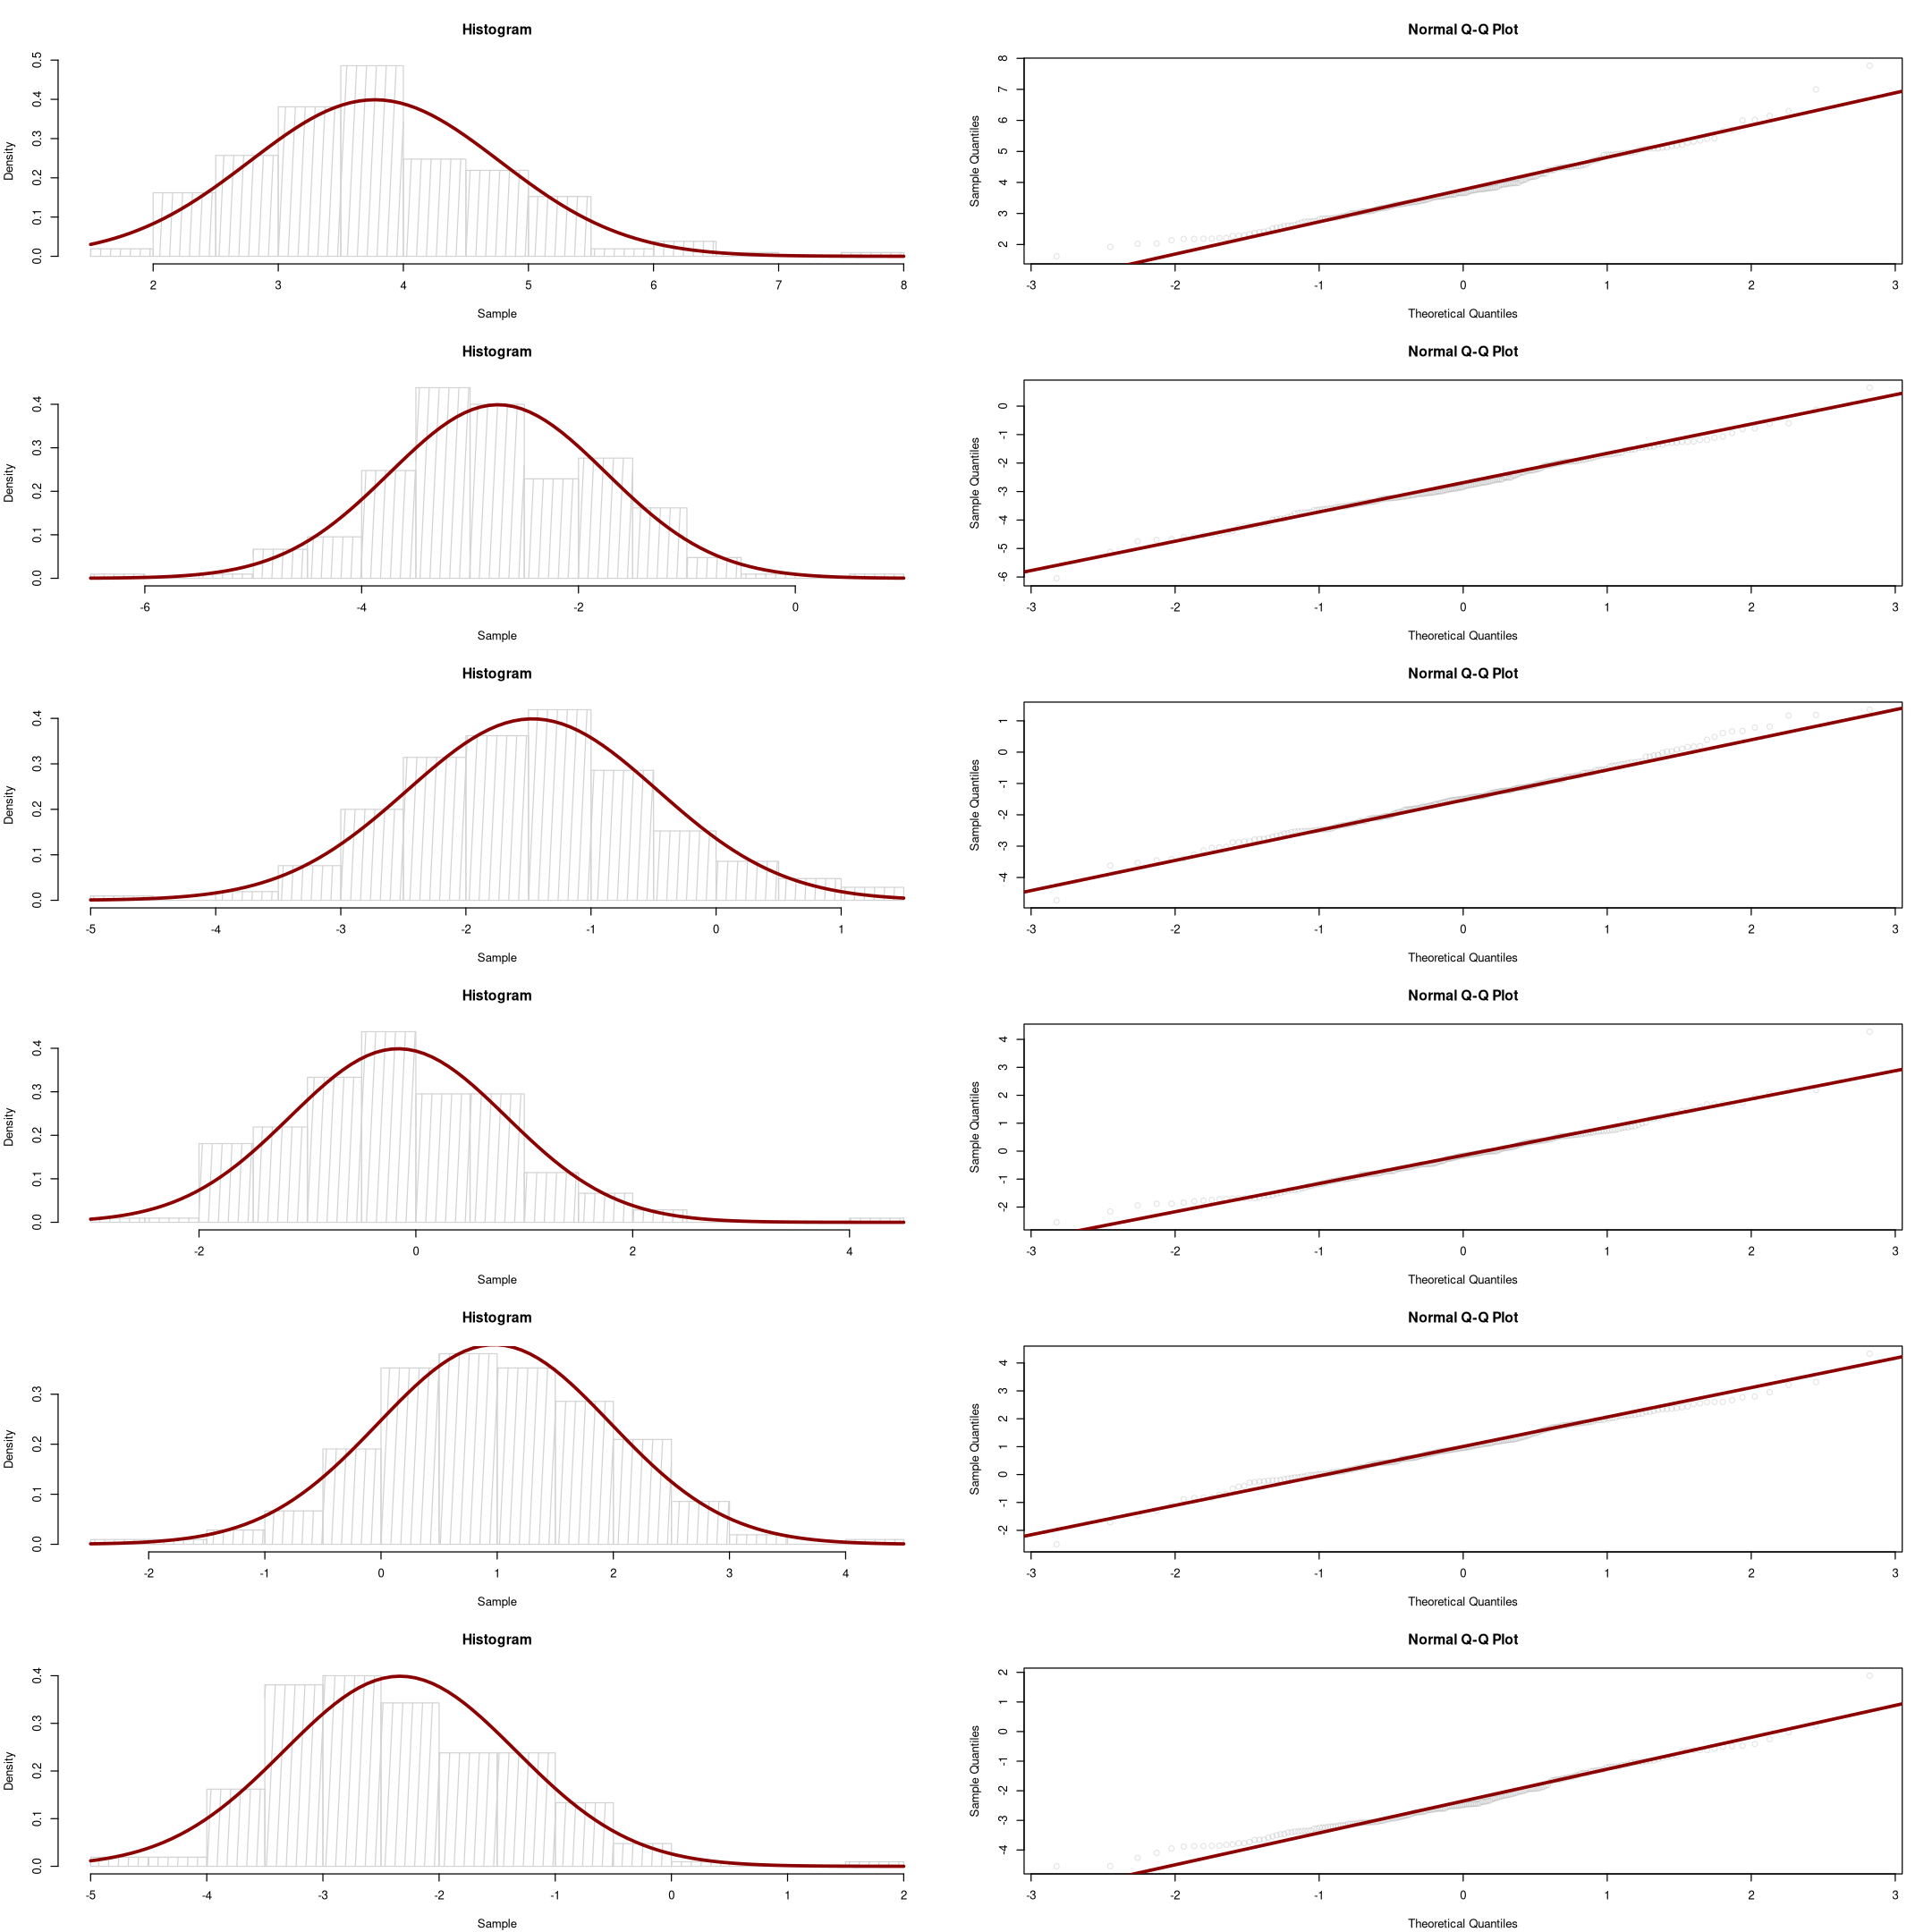

In [11]:
par(mfrow = c(6, 2), mar=c(4.1, 4.1, 4.1, 2.1))
options(repr.plot.width=18, repr.plot.height=18)

for (i in 1:6) {
	Sample = data[,i]
	hist(Sample, density=50, breaks=16, prob=TRUE, main="Histogram")
	curve(dnorm(x, mean=mean(Sample), sd=sqrt(var(Sample))), col="darkred", lwd=3, add=TRUE)

	qqnorm(Sample, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.1))
	qqline(Sample, col="darkred", lwd=3)
}

Data appears normally distributed and is standardized to have its standard deviation equal to one

In [12]:
first = data[1:5,]; first
µmle = as.matrix(as.numeric(colMeans(first)))
µ = as.matrix(as.numeric(colMeans(data[6:210,])))
# µ = as.matrix(as.numeric(colMeans(data)))

,22207,19653,18493,5415,11986,7759,4085,2434,2345,5109,⋯,24921,19907,17005,11461,13934,22576,10907,11430,18485,12365
NA06985,3.320701,-4.672019,-3.6207425,-1.8788372,-1.304469,-2.1400544,-0.6836783,-0.6329174,2.916898,6.858462,⋯,-1.2646257,-3.6788223,-4.064593,-4.204200,-4.653301,2.291804,-4.5613786,0.8238200,2.663034,-1.282643
NA06993,4.522049,-2.504244,-0.2989289,1.4740600,1.952473,-0.8951127,1.2726317,0.2504213,3.031755,6.379089,⋯,0.9805873,-1.6659186,-3.935630,-3.568862,-1.885880,3.073146,-0.8298840,2.7096547,2.178062,-1.270634
NA07022,3.593433,-2.993319,-1.1402403,-1.0598208,1.248440,-2.4596897,1.2115513,-0.7036789,3.121900,7.938343,⋯,-2.2887468,-0.8547229,-3.655642,-2.887934,-1.629679,2.061270,-1.6536221,0.9795550,2.414203,-2.635291
NA07034,4.043400,-2.163135,-1.6537376,0.2452835,1.688383,-0.9272713,1.6320421,0.5425016,2.458150,7.731027,⋯,-2.3846812,-0.9925057,-3.033247,-2.722733,-1.613975,1.517324,-2.3507371,-0.3230593,2.188321,-2.646971
NA07055,4.899260,-2.276058,0.1766910,0.5478394,1.323379,-2.1625483,0.3988189,0.8411762,1.783395,7.105700,⋯,-0.6617594,-1.2074156,-3.378331,-3.555149,-2.252320,2.230214,-0.9541902,1.5572120,1.979752,-1.028758


$\hat{\mu}_{JS} = \left( 1 - \frac{k-2}{\| \bar{x} \|^2} \right) \bar{x}$


In [13]:
xnorm = sum(µmle**2)
µjs.zero = (1 - (1/5)*(ncol(data) - 2) / xnorm) * µmle

$\hat{\mu}_{JS} = \mu_0 + \left( 1 - \frac{k-2}{\| \bar{x} - \mu_0 \|^2} \right) (\bar{x} - \mu_0)$


In [14]:
# should we use true mean here?
xnorm = sum((µmle - µ)**2)
µjs.mean = µ + (1 - (1/5)*(ncol(data) - 2) / xnorm) * (µmle - µ)

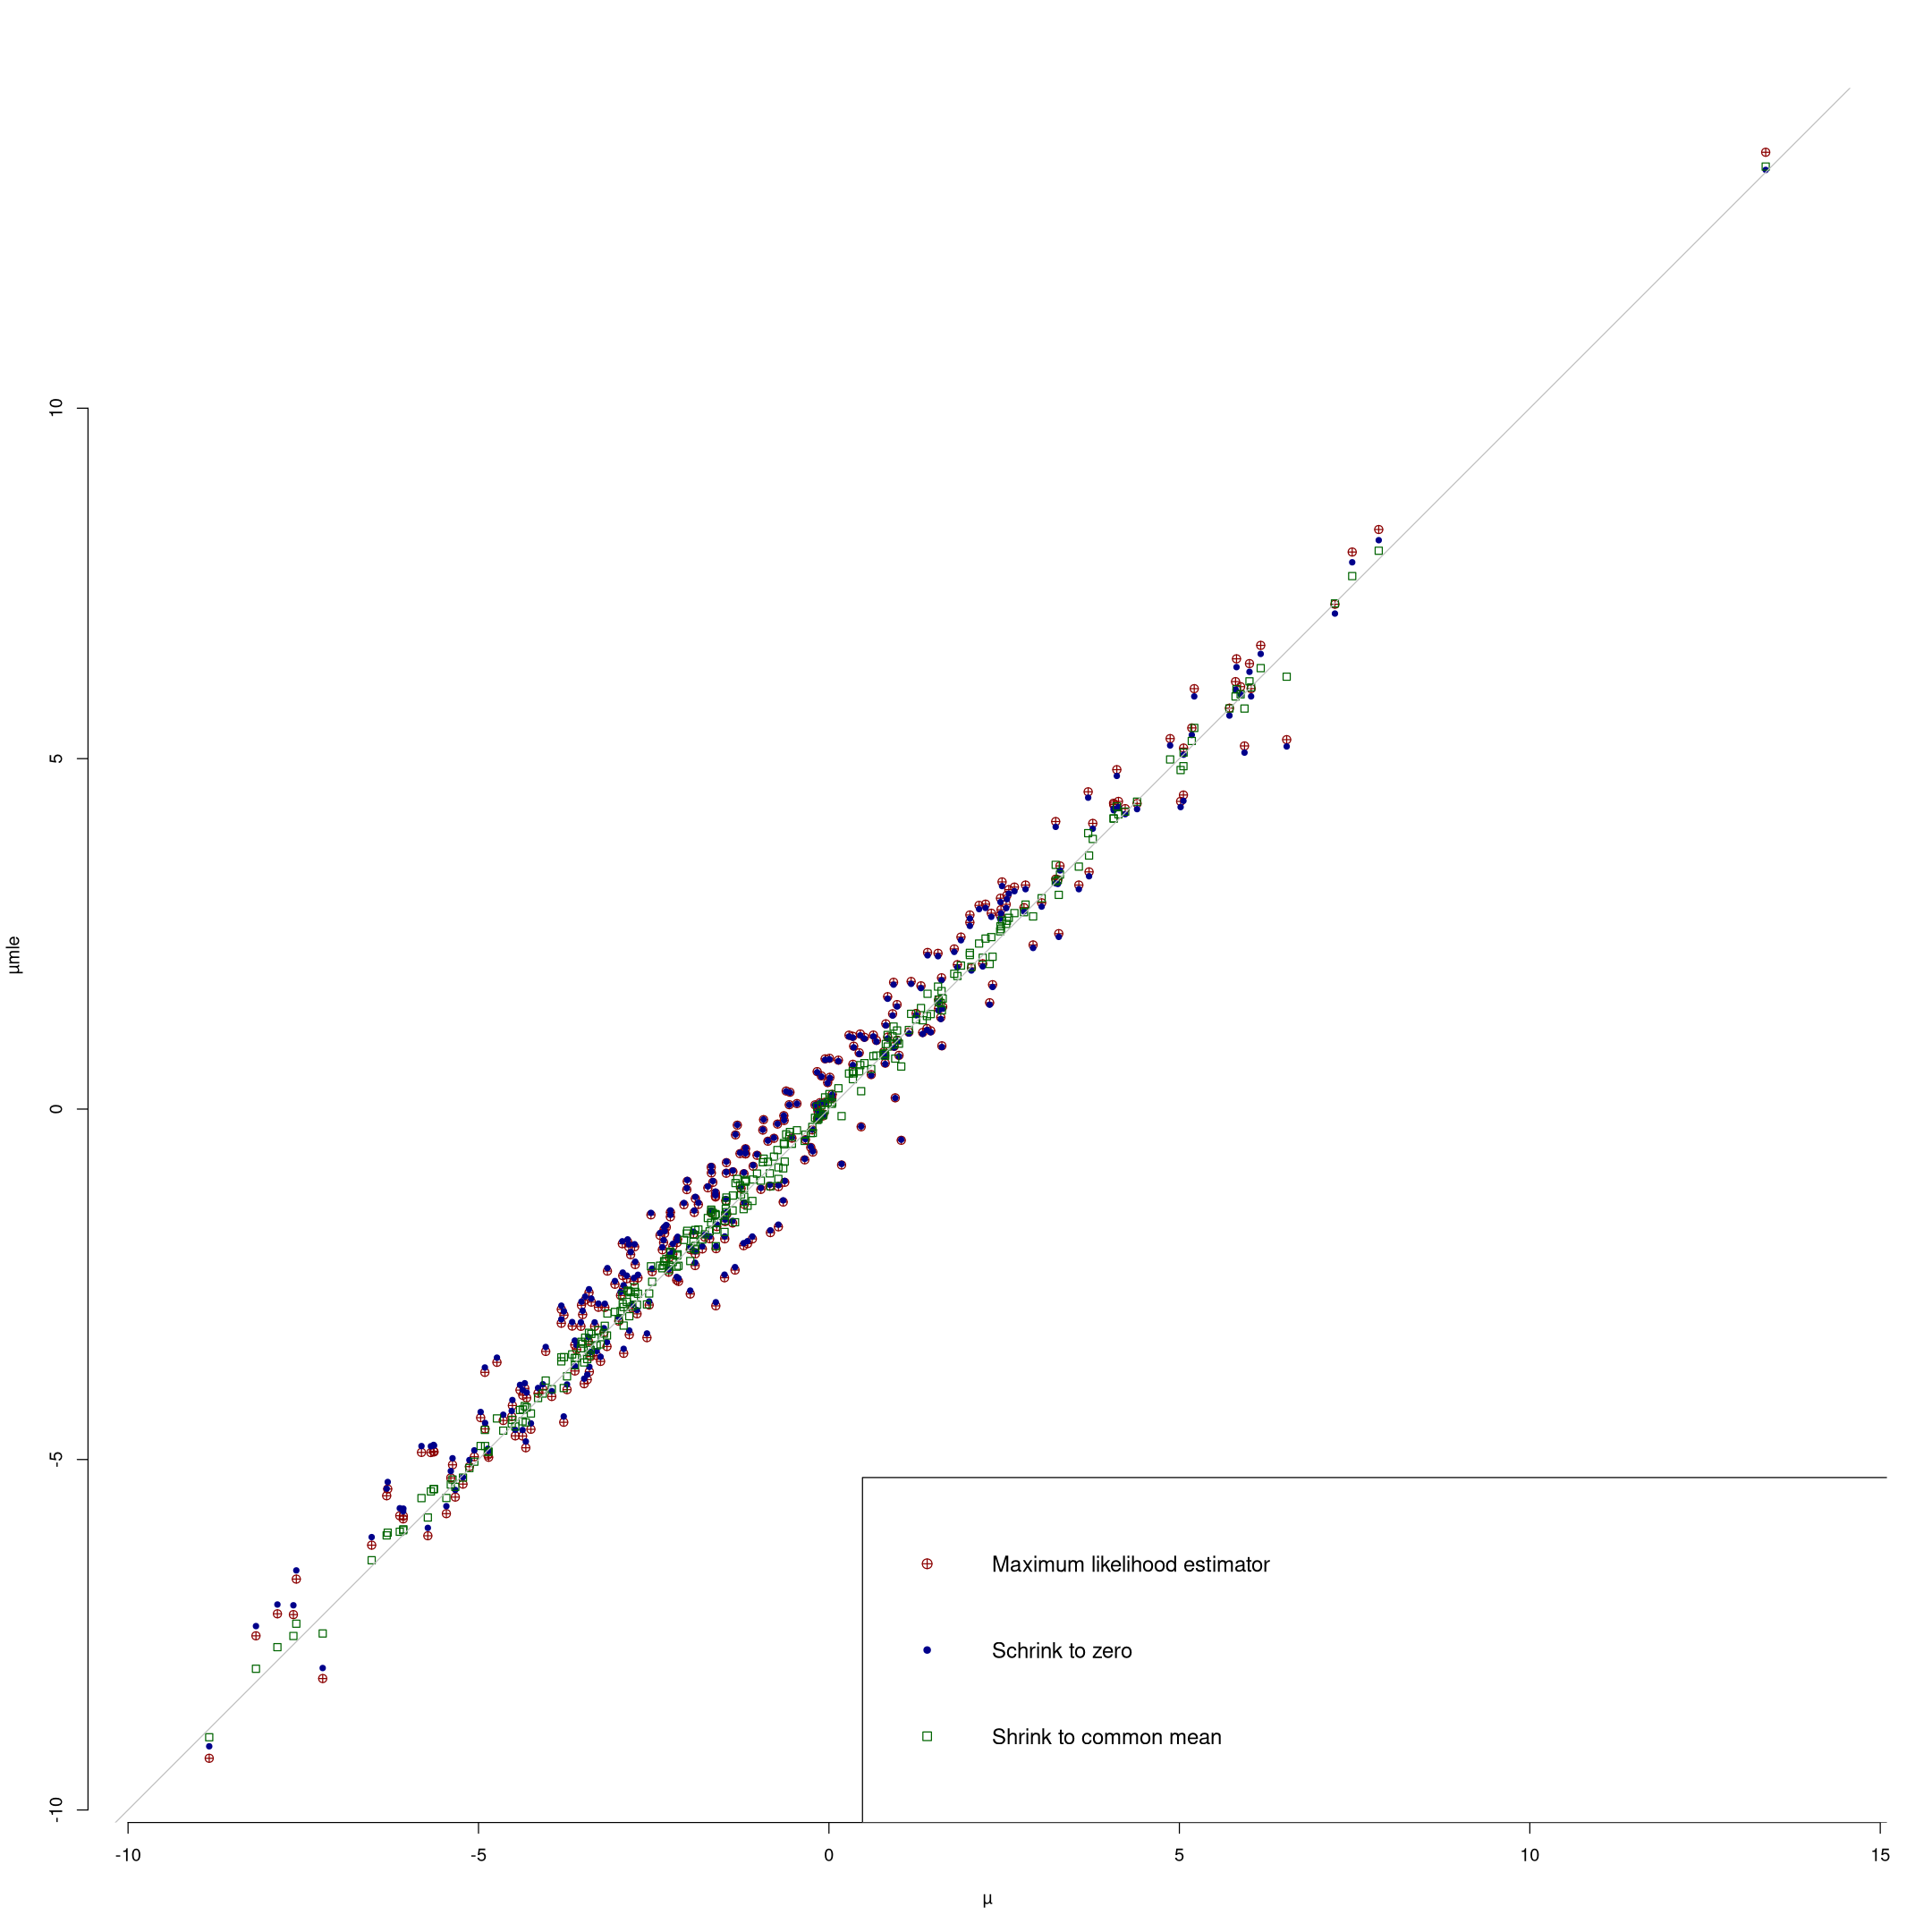

In [47]:
plot(µ, µmle, col = "darkred", asp = 1, frame = FALSE, pch=10)
points(µ, µjs.zero, col = "darkblue", pch=20)
points(µ, µjs.mean, col = "darkgreen", pch=22)
abline(0, 1, col = "gray")
legend(
	"bottomright",
	legend = c("Maximum likelihood estimator", "Schrink to zero", "Shrink to common mean"),
	col = c("darkred", "darkblue", "darkgreen"),
	pch = c(10, 20, 22),
	cex = 1.2,
)

Mean sqared errors ???

In [16]:
sum((µ - µmle)**2)

[1] 83.61966

In [17]:
sum((µ - µjs.zero)**2)

[1] 85.12885

In [18]:
sum((µ - µjs.mean)**2)

[1] 6.899625

### Project 1

In [57]:
n = 1000; p = 950
X = matrix(data = rnorm(n * p, 0, sqrt(1e-3)), nrow = n)

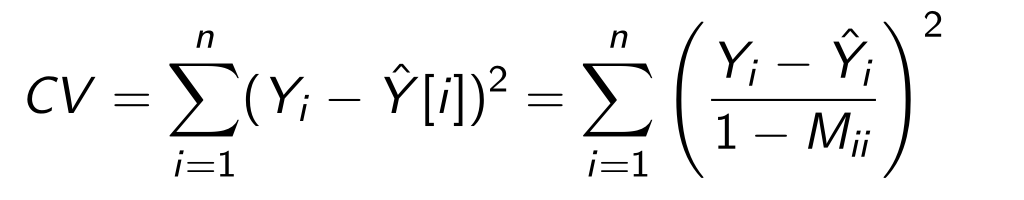

In [66]:
model.prediction.error = function(p) {
	β = rep(0, p)
	β[1:min(5, p)] <- 3
	X = X[,1:p]

	e = rnorm(n, 0, 1)
	y = X %*% β + e

	B = solve(t(X) %*% X) %*% t(X) %*% y

	Y =  X %*% B
	RSS = sum((Y - y)**2)
	M = X %*% solve(t(X) %*% X) %*% t(X)
	var = RSS / (n - p)

	return(c(
		PE  = sum((X %*% (β - B))**2) + n,
		PE1 = RSS + 2*var*p,
		PE2 = RSS + 2*p,
		PE3 = sum(((Y - y) / (1 - diag(M)))**2)
	))
}

In [68]:
rowMeans(replicate(100, model.prediction.error(2)))
rowMeans(replicate(100, model.prediction.error(5)))
rowMeans(replicate(100, model.prediction.error(10)))
rowMeans(replicate(100, model.prediction.error(100)))
rowMeans(replicate(100, model.prediction.error(500)))
rowMeans(replicate(100, model.prediction.error(950)))

PE       PE1       PE2       PE3 
1002.0498  998.8430  998.8557  998.8217

PE      PE1      PE2      PE3 
1005.250 1005.360 1005.357 1005.391

PE      PE1      PE2      PE3 
1009.394 1018.630 1018.459 1018.692

PE      PE1      PE2      PE3 
1098.062 1102.137 1101.749 1113.572

PE      PE1      PE2      PE3 
1502.516 1496.972 1498.991 2000.175

PE       PE1       PE2       PE3 
 1941.960  1985.979  1950.923 21216.431

In [69]:
residual.boxplots = function(p) {
	estimators = t(data.frame(replicate(30, model.prediction.error(p))))
	residuals = (estimators - estimators[,1])[, -1]
	data = gather(data.frame(residuals), key = "PE", value = "Value")
	return(
		ggplot(data, aes(x=PE, y=Value, color=PE)) +
		geom_boxplot() +
		theme_minimal() +
		ggtitle(paste(p, " variables")) +
		ylab("Error") +
		theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5))
	)
}

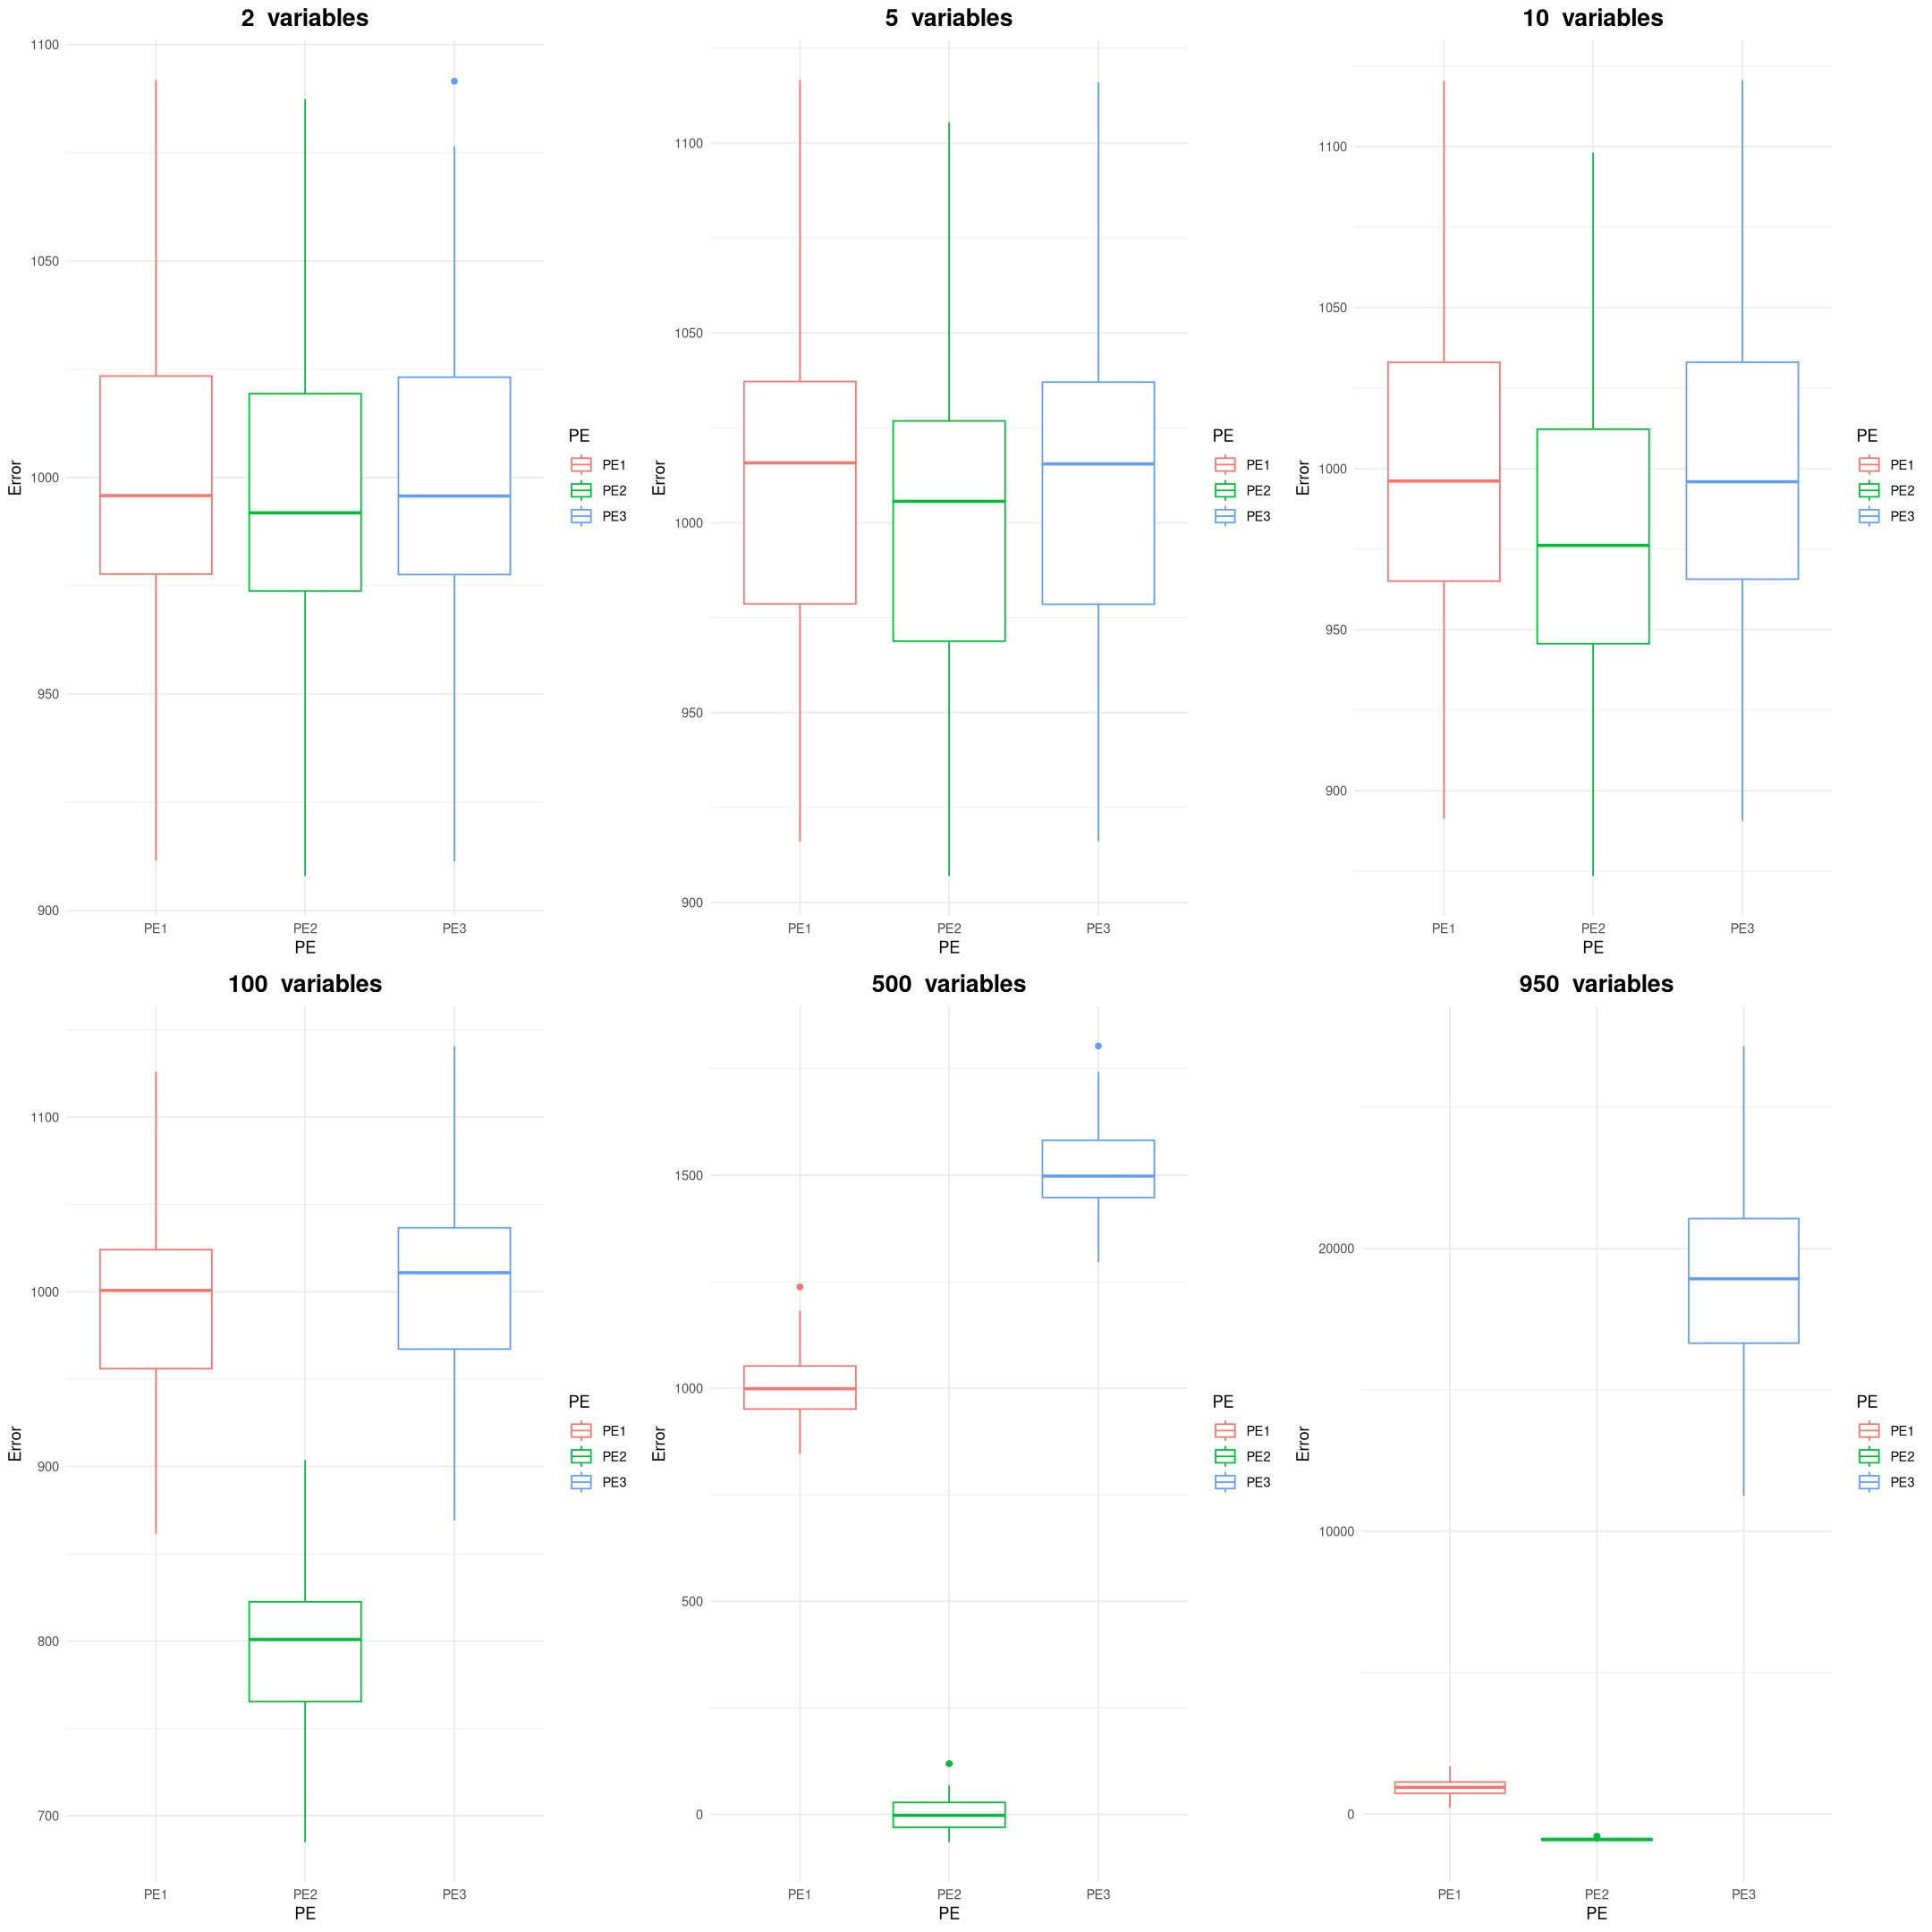

In [65]:
grid.arrange(
	residual.boxplots(2),
	residual.boxplots(5),
	residual.boxplots(10),
	residual.boxplots(100),
	residual.boxplots(500),
	residual.boxplots(950),
ncol = 3)

### Project 2

In [21]:
n = 1000; p = 950
X = matrix(data = rnorm(n * p, 0, sqrt(1e-3)), nrow = n)
β = rep(0, p); β[1:20] <- 6
e = rnorm(n, 0, 1)
y = X %*% β + e

In [22]:
metrics = function(B) c(
	E1  = sum((B - β)**2),
	E2  = sum((X %*% (B - β))**2),
	FDP = sum(B[21:p] != 0) / sum(B != 0),
	TPP = sum(B[1:20] != 0) / 20
) 

#### mBIC2

In [ ]:
# https://cran.r-project.org/web/packages/bigstep/vignettes/bigstep.html
big = prepare_data(y, X)
results = stepwise(big, crit = mbic2)
discoveries = as.numeric(results$model)

Starting stepwise, 0 variables, crit = 566.24, MSE = 1.762.



Variable 9 added with crit = 541.08, MSE = 1.687.

Variable 17 added with crit = 522.66, MSE = 1.63.

Variable 19 added with crit = 505.17, MSE = 1.577.

Variable 15 added with crit = 489.95, MSE = 1.53.

Variable 3 added with crit = 473.5, MSE = 1.483.

Variable 4 added with crit = 457.58, MSE = 1.439.

Variable 10 added with crit = 441.34, MSE = 1.396.

Variable 18 added with crit = 424.17, MSE = 1.353.

Variable 5 added with crit = 408.8, MSE = 1.315.

Variable 14 added with crit = 392.67, MSE = 1.277.

Variable 7 added with crit = 376.11, MSE = 1.24.

Variable 13 added with crit = 357.78, MSE = 1.202.

Variable 1 added with crit = 340.16, MSE = 1.166.

Variable 12 added with crit = 322.29, MSE = 1.131.

Variable 8 added with crit = 302.69, MSE = 1.095.

Variable 16 added with crit = 288.55, MSE = 1.067.

Variable 2 added with crit = 272.52, MSE = 1.037.

Variable 20 added with crit = 260.26, MSE = 1.012.

Variable 6 added with crit = 251.39, MSE = 0.991.

Variable 11 added with cri

In [ ]:
discoveries

[1]  9 17 19 15  3  4 10 18  5 14  7 13  1 12  8 16  2 20  6 11

In [ ]:
B = rep(0, p)
B[discoveries] = as.numeric(get_model(results)$coefficients)[-1]

In [ ]:
metrics(B)

E1       E2      FDP      TPP 
22.72465 22.60327  0.00000  1.00000

#### Ridge

In [ ]:
# use intercept?
ridge = cv.glmnet(X, y, alpha=0, intercept = F)
ridge.metrics = metrics(coef(ridge)[-1,])

In [ ]:
ridge.metrics

E1          E2         FDP         TPP 
553.3288241 405.2614427   0.9789474   1.0000000

#### LASSO

When fitting a cross-validated lasso model using cv.glmnet, two lambda values are commonly reported:

`cv_fit$lambda.min`: The value of lambda that gives the minimum mean cross-validated error. This is often referred to as the "best" lambda because it directly minimizes the prediction error on the validation set.

`cv_fit$lambda.1se`: The largest value of lambda for which the mean cross-validated error is within one standard error of the minimum. This lambda value usually results in a sparser model (fewer non-zero coefficients), potentially improving interpretability and generalization by favoring simpler models.

In [ ]:
lasso = cv.glmnet(X, y, alpha=1)
lasso.min.metrics = metrics(coef(lasso, s = "lambda.min")[-1,])
lasso.1se.metrics = metrics(coef(lasso, s = "lambda.1se")[-1,])

In [ ]:
lasso.min.metrics

E1         E2        FDP        TPP 
99.5408851 87.5081814  0.8113208  1.0000000

In [ ]:
lasso.1se.metrics

E1          E2         FDP         TPP 
126.6580120 114.7159229   0.5238095   1.0000000

In [35]:
lasso.arg = glmnet(X, y, alpha=1, lambda = qnorm(1 - 0.1/2/p)/n)

In [36]:
lasso.arg.metrics = metrics(coef(lasso.arg)[-1,])

In [37]:
lasso.arg.metrics

E1          E2         FDP         TPP 
1775.197692  675.417800    0.973822    1.000000

In [27]:
lasso.ols = glmnet(X, y, alpha=1, lambda=0)
lasso.ols.metrics = metrics(coef(lasso)[-1,])
lasso.ols.metrics

ERROR: Error in eval(expr, envir, enclos): object 'lasso' not found


In [ ]:
glmnet(X, Y, alpha = 1, lambda = 0)

#### SLOPE

In [ ]:
# https://cran.r-project.org/web/packages/SLOPE/vignettes/introduction.html
slope = SLOPE(X, y, lambda = qnorm(1 - seq(1, 950, 1)*0.1/2/p)/n)

In [ ]:
metrics(coef(slope)[,20][-1])

E1           E2          FDP          TPP 
1.849307e+04 9.897565e+02 9.789252e-01 1.000000e+00

In [ ]:
slope = SLOPE(X, y, lambda=rep(0, 950))
metrics(coef(slope)[,2][-1])

E1       E2      FDP      TPP 
720.0000 691.8312      NaN   0.0000